<a href="https://colab.research.google.com/github/Tongxi-Hu/deep-learning/blob/main/misc/simple_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- prediction with one linear layer

In [1]:
import torch 
import torch.nn as nn
import numpy as np

### 0) mock data

In [4]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
inputs.shape, targets.shape

(torch.Size([15, 3]), torch.Size([15, 2]))

### 1) dataloader

In [5]:
from torch.utils.data import TensorDataset
train_ds=TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]), tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [ ]:
from torch.utils.data import DataLoader
batch_size=5
train_dl=DataLoader(train_ds,batch_size, shuffle=True)
for xb,yb in train_dl:
    print(xb)
    print(yb)
    break

### 2) model

In [7]:
model=nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.2908, -0.1692, -0.1615],
        [ 0.3104,  0.1935, -0.2358]], requires_grad=True)
Parameter containing:
tensor([-0.3188, -0.0655], requires_grad=True)


### 3) loss and optimizer

In [8]:
import torch.nn.functional as F
loss_fn=F.mse_loss
optimizer=torch.optim.SGD(model.parameters(),lr=1e-5)

### 4) training

In [9]:
def train(num_epochs,model,loss,optimizer,trin_dl):
    for epoch in range(num_epochs):
        model.train()
        for xb,yb in train_dl:
            pred=model(xb)
            l=loss(pred,yb)
            l.backward()
            optimizer.step()
            optimizer.zero_grad()
        if(epoch+1)%10==0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, l.item()))

train(100,model,loss_fn,optimizer,train_dl)

Epoch [10/100], Loss: 275.8152
Epoch [20/100], Loss: 704.6989
Epoch [30/100], Loss: 496.9051
Epoch [40/100], Loss: 97.8044
Epoch [50/100], Loss: 67.8088
Epoch [60/100], Loss: 195.0151
Epoch [70/100], Loss: 64.4038
Epoch [80/100], Loss: 42.8279
Epoch [90/100], Loss: 15.0170
Epoch [100/100], Loss: 72.1140


### 4) compare

In [10]:
# Generate predictions
preds = model(inputs)
preds-targets

tensor([[  2.6967,   2.0778],
        [ -0.6320,  -4.2289],
        [  0.5812,   6.3543],
        [  8.6640,   9.5509],
        [ -9.8736, -12.2498],
        [  0.6423,   2.0851],
        [ -0.2022,  -5.9319],
        [  1.7108,   7.5695],
        [ 10.7184,   9.5437],
        [-10.3894, -10.9600],
        [  1.1265,   2.3749],
        [ -2.6864,  -4.2217],
        [  2.1514,   6.0573],
        [ 10.1798,   8.2611],
        [ -7.8192, -12.2571]], grad_fn=<SubBackward0>)

# 2-logistic regression with MNIST

### 0) data

In [ ]:
import torch 
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import MNIST

dataset=MNIST(root="data/",download=True)
len(dataset)

In [2]:
test_data=MNIST(root="data/",train=False)
len(test_data)

10000

In [3]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F2D3DABE3D0>, 5)

label: 5


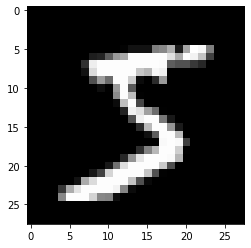

In [4]:
image,label=dataset[0]
plt.imshow(image,cmap="gray")
print('label:',label)

In [5]:
import torchvision.transforms as transforms
dataset=MNIST(root="data/",train=True,transform=transforms.ToTensor())
img_tensor,label=dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


### 1) train and validate

In [6]:
from torch.utils.data import random_split
train_ds,validat_ds=random_split(dataset,[50000,10000])
len(train_ds),len(validat_ds)

(50000, 10000)

In [7]:
from torch.utils.data import DataLoader
batch_size=128
train_loader=DataLoader(train_ds,batch_size,shuffle=True)
validate_loader=DataLoader(validat_ds,batch_size)

### 1) model

In [12]:
import torch.nn as nn
input_size=28*28
num_classes=10
model=nn.Sequential(nn.Flatten(),nn.Linear(input_size,256),nn.ReLU(),nn.Linear(256,num_classes))

In [13]:
loss=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

### 2) train

In [14]:
num_epochs=10
for epoch in range(num_epochs):
    for img, label in train_loader:
        l=loss(model(img),label)
        l.sum().backward()
        optimizer.step()
        optimizer.zero_grad()
    with torch.no_grad():
        train_l=loss(model(img),label)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.391857
epoch 2, loss 0.284591
epoch 3, loss 0.225802
epoch 4, loss 0.199772
epoch 5, loss 0.069850
epoch 6, loss 0.148825
epoch 7, loss 0.128083
epoch 8, loss 0.043481
epoch 9, loss 0.087508
epoch 10, loss 0.079754


### 3) Fashion MNIST

### 1) data

In [15]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

In [ ]:
dataset = FashionMNIST(root='data/', download=True, transform=ToTensor())
test_dataset = FashionMNIST(root='data/', train=False, transform=ToTensor())

In [17]:
val_size = 10000
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [18]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size*2, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


images.shape: torch.Size([128, 1, 28, 28])


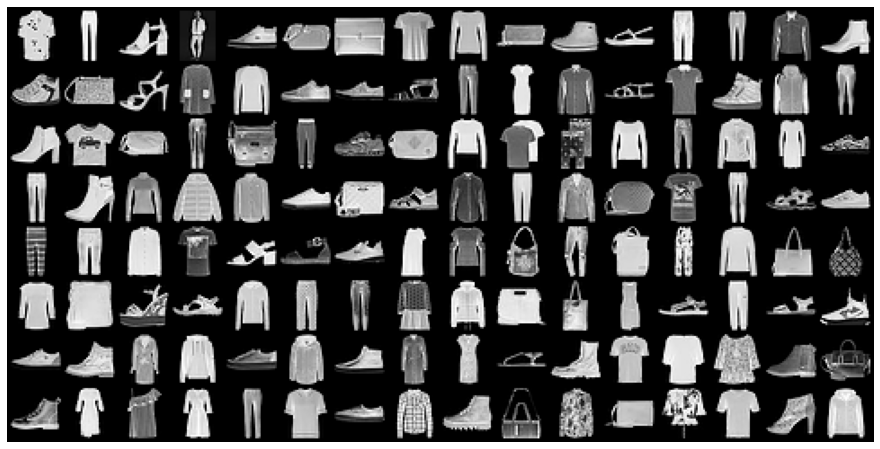

In [19]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

### 1) model

In [21]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, 16)
        # hidden layer 2
        self.linear2 = nn.Linear(16, 32)
        # output layer
        self.linear3 = nn.Linear(32, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        out = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer 1
        out = self.linear1(out)
        # Apply activation function
        out = F.relu(out)
        # Get intermediate outputs using hidden layer 2
        out = self.linear2(out)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear3(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))



### 3) use gpu

In [22]:
torch.cuda.is_available()

False

In [23]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [24]:
device = get_default_device()
device

device(type='cpu')

In [25]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [26]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [27]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [28]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [29]:
input_size = 784
num_classes = 10

In [30]:
model = MnistModel(input_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=10, bias=True)
)

In [31]:
history = [evaluate(model, val_loader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.15556640923023224, 'val_loss': 2.312208890914917}]

In [32]:
history += fit(5, 0.5, model, train_loader, val_loader)
history += fit(5, 0.1, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 0.7657, val_acc: 0.6931
Epoch [1], val_loss: 0.6153, val_acc: 0.7766
Epoch [2], val_loss: 0.5573, val_acc: 0.7908
Epoch [3], val_loss: 0.5699, val_acc: 0.8037
Epoch [4], val_loss: 0.5130, val_acc: 0.8223
Epoch [0], val_loss: 0.4619, val_acc: 0.8371
Epoch [1], val_loss: 0.4556, val_acc: 0.8408
Epoch [2], val_loss: 0.4511, val_acc: 0.8430
Epoch [3], val_loss: 0.4445, val_acc: 0.8439
Epoch [4], val_loss: 0.4379, val_acc: 0.8456


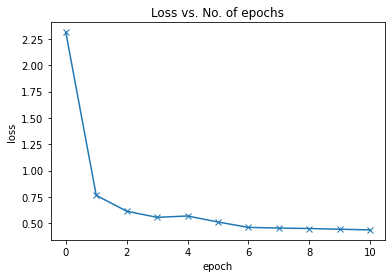

In [33]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

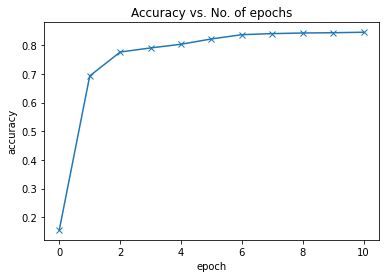

In [34]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');